<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [86]:
result

<Response [200]>

In [87]:
type(result)

requests.models.Response

In [88]:
result.text

'<!doctype html>\n<html>\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2019 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/slight.673caeca693d.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" type="text/css" href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2019/site_media/static/css/simple-grid.d1149de00d41.css"/>\n\n\n\n    <meta property="og:image" content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" />\n    <link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon" />\n    

In [89]:
type(result.text)

str

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [91]:
soup

<!DOCTYPE html>
<html>
<head>
<title>Talks | PyCon 2019 in Cleveland, Ohio</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet"/>
<link href="/2019/site_media/static/css/slight.673caeca693d.css" media="all" rel="stylesheet" type="text/css"/>
<link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/jquery.markedit.73000ed650c8.css" rel="stylesheet" type="text/css"/>
<link href="/2019/site_media/static/css/simple-grid.d1149de00d41.css" media="all" rel="stylesheet" type="text/css"/>
<meta content="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" property="og:image"/>
<link href="/2019/site_media/static/img/pycon2019.fa9f6ec45f42.png" rel="shortcut icon"/>
<script src="//ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js"></script>
<script>
  

In [92]:
type(soup)

bs4.BeautifulSoup

In [93]:
soup.select('h2')

[<h2>
 <a href="/2019/schedule/presentation/235/" id="presentation-235">
         5 Steps to Build Python Native GUI Widgets for BeeWare
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/196/" id="presentation-196">
         8 things that happen at the dot:  Attribute Access &amp; Descriptors
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/210/" id="presentation-210">
         Account Security Patterns: How Logged-In Are you?
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/240/" id="presentation-240">
         Ace Your Technical Interview Using Python
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/161/" id="presentation-161">
         Advanced asyncio: Solving Real-world Production Problems
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/230/" id="presentation-230">
         A Guide to Software Engineering for Visually Impaired
       </a>
 </h2>, <h2>
 <a href="/2019/schedule/presentation/157/" id="presentation-

In [94]:
type(soup.select('h2'))

list

In [95]:
len(soup.select('h2'))

95

In [0]:
first = soup.select('h2')[0]

In [97]:
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [98]:
type(first)

bs4.element.Tag

In [99]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [100]:
type(first.text)

str

In [101]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [102]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:
# The long way
titles = []
for tag in soup.select('h2'):
  title = tag.text.strip()
  titles.append(title)

titles

# can be done like this

titles = [tag.text.strip() 
          for tag in soup.select('h2')]

In [104]:
type(titles), len(titles)

(list, 95)

In [105]:
titles[0], titles[-1]

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [106]:
long_titles = []
for title in titles:
  if len(title) > 80:
    long_titles.append(title)
long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [0]:
long_titles = [title for title in titles if len(title) > 80]

### 3. Filter with named function

In [108]:
def long(title):
  return len(title) > 80
long('woo python')

False

In [109]:
long(long_titles[1])

True

In [110]:
filter(long, titles)

In [111]:
# Don't forget this function again. Super helpful
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [112]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [114]:
df = pd.DataFrame({'title':titles})

df.shape

(95, 1)

In [115]:
df[df['title'].str.len() > 80]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

In [0]:
df['title_length'] = df['title'].apply(len)

In [117]:
df.head()

,title,title_length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [118]:
df.shape

(95, 2)

### title length

In [119]:
df.loc[df['title_length'] > 80, 'title']

30          ¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38                  Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43                 How to engage Python contributors in the long term? Tech is easy, people are hard.
48              Lessons learned from building a community of Python users among thousands of analysts
50                 Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting
60    One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.
66                 Put down the deep learning: When not to use neural networks and what to do instead
84         Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline
Name: title, dtype: object

### long title

In [0]:
df['long_title'] = df['title_length'] > 80

In [121]:
df.head()

,title,title_length,long_title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [122]:
df.shape

(95, 3)

In [123]:
df[df['long_title'] == True]

,title,title_length,long_title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [124]:
df['first_letter'] = df['title'].str[0]
df['first_letter'].head()

0    5
1    8
2    A
3    A
4    A
Name: first_letter, dtype: object

In [125]:
df[df['first_letter'] == 'P']

,title,title_length,long_title,first_letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [126]:
'Python is cool'.startswith('P')

True

In [127]:
df[df['title'].str.startswith('P')]

,title,title_length,long_title,first_letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [128]:
df[df['title'].str.contains('Python')]

,title,title_length,long_title,first_letter
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5
3,Ace Your Technical Interview Using Python,41,False,A
6,A Medieval DSL? Parsing Heraldic Blazons with Python!,53,False,A
7,A New Era in Python Governance,30,False,A
10,A Snake in the Bits: Security Automation with Python,52,False,A
14,Break the Cycle: Three excellent Python tools to automate repetitive tasks,74,False,B
17,Building reproducible Python applications for secured environments,66,False,B
19,Coded Readers: Using Python to uncover surprising patterns in the books you love,80,False,C
20,Code Review Skills for Pythonistas,34,False,C
21,CUDA in your Python: Effective Parallel Programming on the GPU,62,False,C


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [129]:
!pip install textstat

In [0]:
import textstat

In [131]:
#counts number of words!
df['title'].apply(textstat.lexicon_count)

0     10
1     10
2      7
3      6
4      6
5      8
6      8
7      6
8      5
9      8
10     9
11     7
12     4
13     7
14    11
15     5
16     6
17     7
18     7
19    13
20     5
21    10
22     6
23     4
24     5
25     7
26     6
27     6
28     9
29     6
      ..
65     4
66    16
67     6
68     3
69     9
70     4
71     9
72     7
73     9
74     5
75     6
76     7
77     6
78     5
79     6
80     9
81    14
82     5
83    13
84    15
85    15
86    11
87     8
88    11
89     4
90     4
91    12
92     5
93     8
94    12
Name: title, Length: 95, dtype: int64

In [0]:
df['word_count'] = df['title'].apply(textstat.lexicon_count)

In [133]:
df.head()

,title,title_length,long_title,first_letter,word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [134]:
df['word_count'].value_counts()

6     18
7     13
9     11
8     10
5      9
4      7
10     6
12     5
13     4
15     3
11     3
3      2
19     1
16     1
14     1
2      1
Name: word_count, dtype: int64

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df_renamed = df.rename(columns={'title_length': 'title_character_count'})

In [136]:
df_renamed.head()

,title,title_character_count,long_title,first_letter,word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [137]:
df_renamed.describe(include='all')

,title,title_character_count,long_title,first_letter,word_count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Machine learning model and dataset versioning practices,NaN,False,T,NaN
freq,1,NaN,87,12,NaN
mean,NaN,51.347368,NaN,NaN,7.978947
std,NaN,17.729509,NaN,NaN,3.218890
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,37.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [138]:
df.describe()

,title_length,word_count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [139]:
df.describe(exclude='number')

,title,long_title,first_letter
count,95,95,95
unique,95,2,22
top,Machine learning model and dataset versioning practices,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [140]:
df_renamed.sort_values(by='title_character_count').head(5)

,title,title_character_count,long_title,first_letter,word_count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


In [141]:
df_renamed.sort_values(by='title_character_count').head(5)['title']

64        Practical decorators
68       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
56    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [142]:
df_renamed.sort_values(by='title_character_count', ascending = False).head()

,title,title_character_count,long_title,first_letter,word_count
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True,O,19
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True,T,15
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
48,Lessons learned from building a community of Python users among thousands of analysts,85,True,L,13
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P,16


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [143]:
df_renamed['first_letter'].value_counts()

T    12
A    11
P     8
M     8
E     7
S     6
B     6
H     5
L     4
G     4
W     4
D     4
C     3
F     3
I     2
R     2
¡     1
5     1
t     1
U     1
8     1
O     1
Name: first_letter, dtype: int64

Percentage of talks with long titles

In [144]:
df_renamed['long_title'].value_counts() / len(df_renamed)

False    0.915789
True     0.084211
Name: long_title, dtype: float64

In [145]:
df_renamed['long_title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long_title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

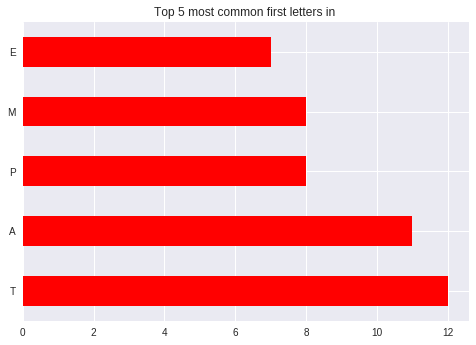

In [146]:
# Inline matplotlib: surround with parintheses 
(df_renamed['first_letter'].
    value_counts().
    head(5)
    .plot
    .barh(color='red',
         title='Top 5 most common first letters in '));

Histogram of title lengths, in characters

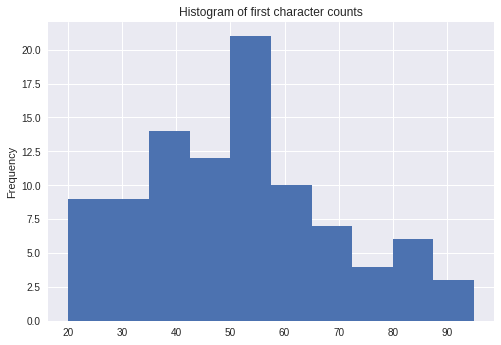

In [147]:
title = 'Histogram of first character counts'
df_renamed['title_character_count'].plot.hist(title=title)

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [0]:
soup.select('.presentation-description')

In [149]:
type(soup.select('.presentation-description'))

list

In [0]:
descriptions = [tag.text.strip() 
                for tag in soup.select('.presentation-description')]

In [151]:
type(descriptions), len(descriptions)

(list, 95)

In [152]:
descriptions[0], descriptions[-1]

("Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 "Time zones are complicated, but they are a fact of engineering life. Time zones have [skipped entire days](http://www.bbc.com/news/world-asia-16351377) and repeated others. There are time zones that switch to [DST twice

In [0]:
des_df = pd.DataFrame({'description':descriptions})

In [0]:
des_df['number of characters'] = des_df['description'].apply(len)
des_df['number of words'] = des_df['description'].apply(textstat.lexicon_count)

In [155]:
des_df.shape

(95, 3)

In [156]:
des_df.head(20)

,description,number of characters,number of words
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96
5,We will look into a day in the life of a Software Engineer with limited vision to Understand their difficulties at work and how they can overcome those difficulties to become successful in their r...,1057,176
6,"Medieval European Nobility was obsessed with Lineage. They created a Heraldic System to track families, which assigned each family a unique Coat of Arms.\r\n\r\nAny painting of the Coat of Arms wa...",774,124
7,"In July of 2018, Guido van Rossum stepped down as “Benevolent Dictator for Life” of Python. In December, Python core developers voted on a new governance structure to guide Python going forward. ...",673,107
8,"If you maintain a library, how can you innovate without breaking the projects that depend on it? Follow semantic versioning, add APIs conservatively, add parameters compatibly, use DeprecationWarn...",337,50
9,"Embroidery is an technology that dates back centuries, and still popular in the present day among craftspeople around the world. Cross-stitch refers to the creation of crosses in a grid that combi...",828,133


In [157]:
des_df.describe()

,number of characters,number of words
count,95.000000,95.000000
mean,813.073684,130.821053
std,415.988191,64.357872
min,121.000000,20.000000
25%,542.500000,85.500000
50%,718.000000,116.000000
75%,1016.500000,165.000000
max,2827.000000,421.000000


In [158]:
des_df.describe(exclude='number')

,description
count,95
unique,95
top,"Everyone starts with the best intentions with their Python projects, ""this time it's going to be clean, simple and maintainable"". But code evolves over time, requirements change and codebases can ..."
freq,1


**Descriptions that could fit in a tweet:**

In [159]:
tweetable = des_df.loc[des_df['number of characters'] <= 280]
tweetable.head()

,description,number of characters,number of words
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20


In [0]:
des_df['grade'] = (des_df['description']
                             .apply(textstat.flesch_kincaid_grade))

In [162]:
des_df.head()

,description,number of characters,number of words,grade
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135,14.1
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56,10.7
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66,8.5
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84,17.3
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96,10.8


In [164]:
des_df.describe()

,number of characters,number of words,grade
count,95.000000,95.000000,95.000000
mean,813.073684,130.821053,20.084211
std,415.988191,64.357872,15.719485
min,121.000000,20.000000,6.100000
25%,542.500000,85.500000,11.100000
50%,718.000000,116.000000,14.100000
75%,1016.500000,165.000000,17.850000
max,2827.000000,421.000000,81.300000


**Reading Level**
- The highest reading level it showed was 81.3. That seems a bit out of bounds for the range of outputs I would expect.
There seem to be a number of entries above 40 as well. I am really not sure what is causing this. Maybe it needs a larger sample of text to work with.

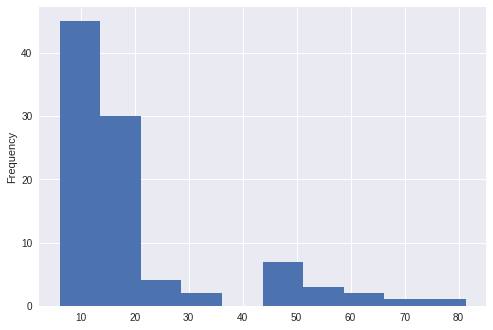

In [166]:
des_df['grade'].plot.hist()

In [167]:
des_df.loc[des_df['grade'] > 40]

,description,number of characters,number of words,grade
7,"In July of 2018, Guido van Rossum stepped down as “Benevolent Dictator for Life” of Python. In December, Python core developers voted on a new governance structure to guide Python going forward. ...",673,107,46.2
18,"The admin interface that comes built-in with Django is one of the most-loved (and oft-abused) features. However, early converts are often disappointed to find that the admin doesn't seem to be sc...",798,127,51.6
19,"We may not always know why we feel a certain way about a great story. In this talk, you'll learn how Python generates new insights into the stories you love. See how some straightforward tools a...",867,145,58.7
24,"Spoiler alert: yes, remote work really does work!\r\n\r\nWith nearly nine years of experience as a remote employee across three different companies, [SPEAKER] knows the ups and downs of remote wo...",791,133,54.0
29,"If we knew all of the bugs we needed to write tests for, wouldn't we just... not write the bugs? So how can testing find bugs that nobody would think of?\r\n\r\nThe answer is to have a computer *...",1152,206,81.3
34,"Methane, the primary component of natural gas, is a 60 times more powerful climate change agent than carbon dioxide. Current technologies for finding methane leaks in oil and gas infrastructure r...",756,114,48.9
46,"Serverless computing is all about paying only for what you use: it can scale up to handle millions of requests, but it can also scale down to 0, costing you nothing if your application is not rece...",2157,311,44.9
53,"PyPI is a gold mine of great packages but those packages have to be written first. More often than not, projects that millions of people depend on are written and maintained by only one person. ...",657,117,46.6
58,"Mocking and patching are powerful techniques for testing, but they can be easily abused, with negative effects on code quality, maintenance, and application architecture. These pain-points can be...",1085,171,70.0
64,"Decorators are one of Python's most powerful features. But even if you understand what they do, it's not always obvious what you can do with them. Sure, from a practical perspective, they let yo...",895,150,60.6


In [168]:
des_df.loc[des_df['grade'] > 40].head()

,description,number of characters,number of words,grade
7,"In July of 2018, Guido van Rossum stepped down as “Benevolent Dictator for Life” of Python. In December, Python core developers voted on a new governance structure to guide Python going forward. ...",673,107,46.2
18,"The admin interface that comes built-in with Django is one of the most-loved (and oft-abused) features. However, early converts are often disappointed to find that the admin doesn't seem to be sc...",798,127,51.6
19,"We may not always know why we feel a certain way about a great story. In this talk, you'll learn how Python generates new insights into the stories you love. See how some straightforward tools a...",867,145,58.7
24,"Spoiler alert: yes, remote work really does work!\r\n\r\nWith nearly nine years of experience as a remote employee across three different companies, [SPEAKER] knows the ups and downs of remote wo...",791,133,54.0
29,"If we knew all of the bugs we needed to write tests for, wouldn't we just... not write the bugs? So how can testing find bugs that nobody would think of?\r\n\r\nThe answer is to have a computer *...",1152,206,81.3


Below is probably more realistic. Just chopped off outliers.

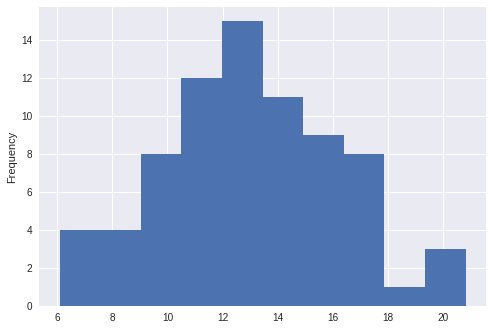

In [178]:
des_df['grade'].loc[des_df['grade'] < 22].plot.hist()